In [2]:
from network import Network
from utils import *

In [3]:
train_X, test_X = train_test_split(X, test_size=0.1)
train_Y, test_Y = train_test_split(Y, test_size=0.1)
print(train_X)
print(train_Y)

[[0.75 0.71]
 [0.   0.  ]
 [0.   0.27]
 [0.3  1.  ]
 [0.5  0.  ]
 [0.5  0.27]
 [0.   0.71]
 [1.   1.  ]
 [0.75 1.  ]
 [1.   0.  ]
 [0.3  0.27]
 [1.   0.71]
 [0.5  1.  ]]
[[0.78 0.85 0.04 0.9  0.9 ]
 [0.64 0.72 0.32 0.74 0.51]
 [0.42 0.49 0.4  0.8  0.28]
 [1.   1.   0.   0.85 0.82]
 [0.75 0.8  0.08 0.97 0.96]
 [0.7  0.72 0.29 0.82 0.63]
 [0.42 0.46 0.32 0.94 0.82]
 [0.11 0.28 0.54 0.   0.  ]
 [0.33 0.33 0.56 0.85 0.75]
 [0.   0.   1.   0.35 0.35]
 [0.03 0.13 0.9  0.22 0.28]
 [0.45 0.49 0.3  0.91 0.71]
 [0.31 0.26 0.49 0.5  0.28]]


In [4]:
print(test_X)
print(test_Y)

[[0.75 0.27]
 [0.3  0.71]]
[[0.22 0.15 0.65 0.69 0.49]
 [0.28 0.23 0.53 0.63 0.37]]


Fim do treino da rede neural.

Número total de gerações: 25000
Tempo de execução: 10.707 segundos.
[[4.37514677e-01 4.30888464e-01 4.39818947e-01 2.14584676e-01
  8.51201544e-02]
 [1.45503280e-01 1.81834827e-01 3.06017483e-01 1.96455362e-01
  3.39264485e-03]
 [9.24384030e-01 8.76884196e-01 9.08568259e-01 2.43278647e-01
  2.32086517e-01]
 [5.82975821e-02 2.76959326e-02 1.79088481e-01 7.46561919e-02
  1.00829016e-03]
 [7.36845174e-02 3.85811896e-02 2.14543559e-01 2.05156502e-02
  3.39264485e-03]
 [3.29237114e-02 7.46858060e-03 9.19232484e-02 1.11044134e-01
  2.30291506e-02]
 [3.61740806e-01 4.30888464e-01 4.00927639e-01 1.46867420e-01
  2.94992940e-02]
 [5.49746504e-01 6.18457911e-01 8.33913182e-01 2.95101932e-01
  3.15567090e-01]
 [8.49424743e-02 7.09801226e-02 1.54597173e-01 2.43278647e-01
  1.69541015e-01]
 [1.69290216e-01 1.81834827e-01 4.26655177e-01 3.06066590e-01
  1.38200728e-01]
 [1.48618559e-03 4.04229560e-03 2.19131934e-03 4.57942797e-05
  1.38146762e-04]]
[[4.06994038e-02 6.0

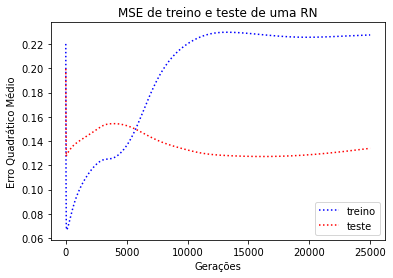

In [5]:
weights = [random_2D_list(2, 7), random_2D_list(7, 5)]
biases = [random_2D_list(1, 7), random_2D_list(1, 5)]

nn = Network(2, 7, 5, weights, biases)
n_gens = 25000
train_neural_network(nn, n_gens)